🔹 Shape of the dataset: (891, 15)

🔹 First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

🔹 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ----

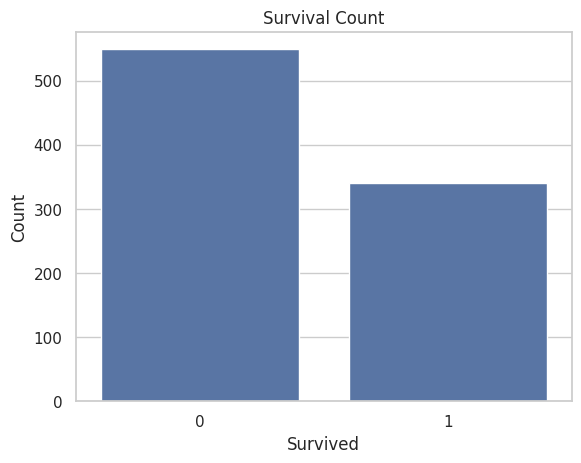

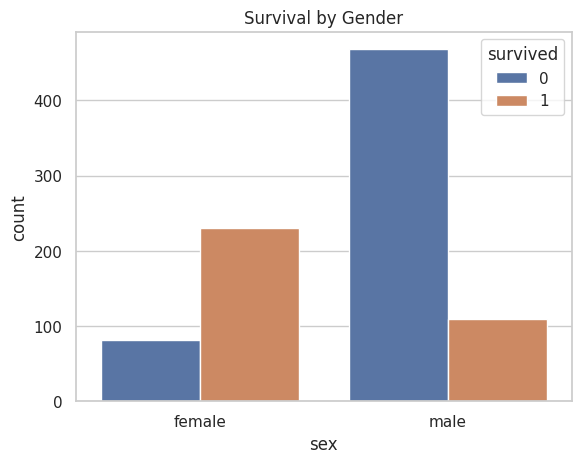

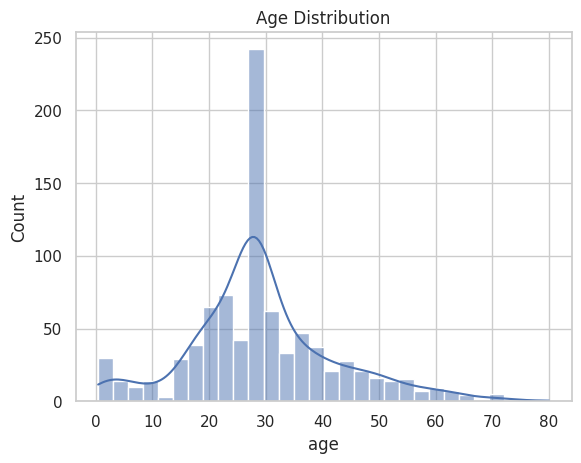

ValueError: could not convert string to float: 'S'

<Figure size 1000x600 with 0 Axes>

In [1]:
# -------------------------------------------------------
# Titanic Dataset: Data Cleaning and EDA
# Author: Your Name
# -------------------------------------------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for clean output

# Load Titanic dataset (can be from seaborn or local CSV)
df = sns.load_dataset('titanic')

# ------------------------------------
# 1. Basic Exploration
# ------------------------------------
print("🔹 Shape of the dataset:", df.shape)
print("\n🔹 First 5 rows:\n", df.head())
print("\n🔹 Info:\n")
df.info()
print("\n🔹 Summary statistics:\n", df.describe(include='all'))

# ------------------------------------
# 2. Data Cleaning
# ------------------------------------

# Check missing values
print("\n🔹 Missing values:\n", df.isnull().sum())

# Drop columns with too many missing values
df.drop(columns=['deck'], inplace=True)

# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop rows with missing 'embark_town'
df.dropna(subset=['embark_town'], inplace=True)

# Convert categorical to category dtype
cat_cols = ['sex', 'class', 'embarked', 'who', 'embark_town', 'alive', 'adult_male']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Verify cleaning
print("\n🔹 Missing values after cleaning:\n", df.isnull().sum())

# ------------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------------

# Survival count
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Survival by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap (numerical)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[['age', 'fare', 'survived', 'pclass']], hue='survived')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# ------------------------------------
# 4. Save the cleaned dataset
# ------------------------------------
df.to_csv("titanic_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'titanic_cleaned.csv'")
